### Import Libraries

In [2]:
from pyensembl import EnsemblRelease
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import pickle

### Load data

In [3]:
# load coordinates
with open('datasets/chromosome_encodings.json', 'rb') as fp:
    chromosome_encoding = pickle.load(fp)

In [4]:
data_df = pd.read_csv("datasets/results.csv")
data_df

,transcript_id,contig,start,end,strand,gene_id,biotype,transcript_name,ncRNA_biotype,disease_variants_present,number_variants,blast_hit
0,ENST00000621052,14,19348216,19384587,-,ENSG00000274827,lncRNA,LINC01297-202,lincRNA,False,0,O00370
1,ENST00000549804,15,25050632,25138756,+,ENSG00000224078,lncRNA,SNHG14-210,antisense_RNA,False,0,B0Y4D6
2,ENST00000415801,9,86948699,87002033,+,ENSG00000226237,lncRNA,GAS1RR-201,lincRNA,False,0,Q96CB5
3,ENST00000609590,6,166999405,167139141,+,ENSG00000272980,retained_intron,NaN,retained_intron,True,4,O54689
4,ENST00000523176,5,149216523,149276805,-,ENSG00000253406,lncRNA,NaN,antisense_RNA,True,5,O94929
...,...,...,...,...,...,...,...,...,...,...,...,...
1228,ENST00000588290,19,567433,572228,-,ENSG00000267751,lncRNA,BSG-AS1-201,antisense_RNA,False,0,Q9NV72
1229,ENST00000521197,7,27140364,27152697,+,ENSG00000254369,lncRNA,HOXA-AS3-203,antisense_RNA,True,1,Q5IS58
1230,ENST00000641534,2,15940185,15942249,-,ENSG00000233718,lncRNA,MYCNOS-204,antisense_RNA,True,18,P04198
1231,ENST00000528233,11,77738680,77739568,-,ENSG00000255409,lncRNA,RSF1-IT1-201,sense_intronic,False,0,Q96NF6


In [5]:
encoded_chromosomes = []

for chromosome in data_df.contig:
    encoded_chromosomes.append(chromosome_encoding[chromosome])
    
data_df["encoded_chomosomes"] = encoded_chromosomes
data_df["size"] = data_df.end - data_df.start
data_df["size"] = (data_df["size"] - data_df["size"].min())/(data_df["size"].max()-data_df["size"].min())

In [9]:
def plot_grapgh(data = None,x:str = None, y:str = None, size:str = None, figure_size:tuple = (15,10), 
                name:str = None,
                legend:str = "auto", sizes:tuple = (50,100), hue = None, alpha:float = 0.7, title:str = None) -> None:
    
    """
    plots a 2d scatter plot given a dataframe, and some custom values
    Inputs:
        data: --> a pandas dataframe that contains the dataset
        x:str --> which column from data that is to be used on the x axis
        y:str --> which column from data that is to be used on the y axis
        size:str --> optional parameter. Column from the data that is used to customize the size of each dot
        figure_size:tuple --> determines the size of the figure (horizontal and vertical dimensions)
        name:str --> name of the file to be saved
        legend: optional: sets the legend property for seaborn scatter plot
        sizes: tuple --> determines the minimum and maximum dot sizes
        hue --> column from data to determine the color value for each point or list of hue points
        alpha:float --> determines feature size
        title:str --> title of the plot
    """
    
    sns.set(style="ticks", color_codes=True)
    sns.set(rc={'figure.figsize':figure_size})
    g=sns.scatterplot(x=x, 
                      y=y, 
                      data=data, 
                      size = size, 
                      alpha = 0.7,
                      legend = legend,
                      sizes = sizes,
                      hue = hue
                      )
    g.set(yscale="log")
    plt.xlabel("Chromosome")
    plt.ylabel("Start Index")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title(title)
    # plt.legend(loc = 'lower right')
    plt.savefig(f'{name}.png',dpi = 600)

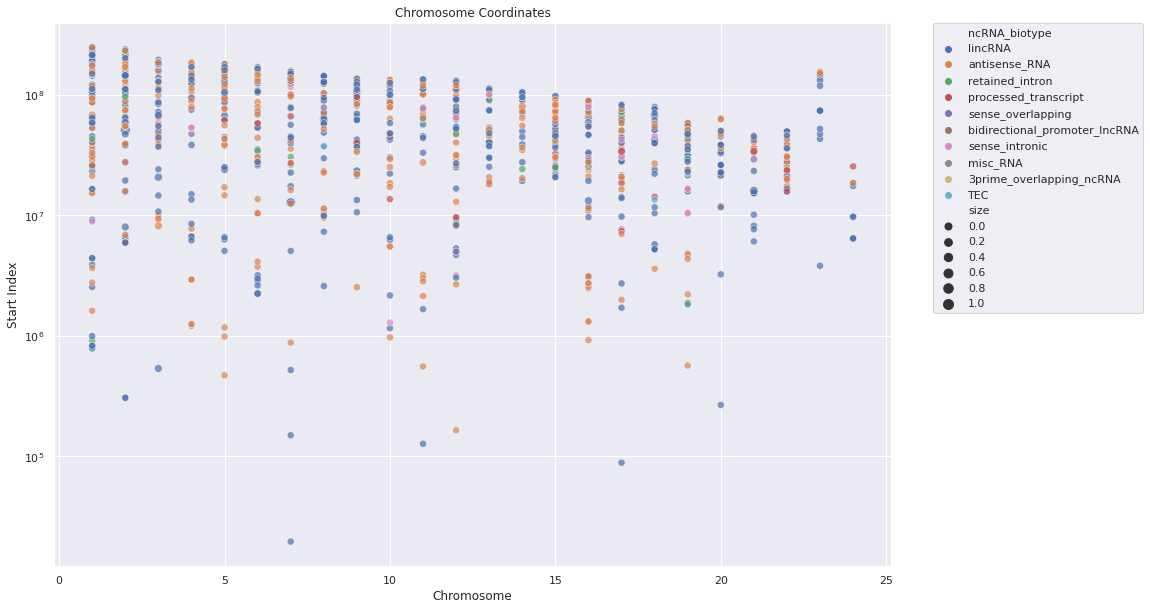

In [12]:
plot_grapgh(data = data_df,
            x = "encoded_chomosomes", 
            y = "start", 
            size = "size", 
            figure_size = (15,10),
            legend = "auto", 
            sizes = (50,100), 
            hue = "ncRNA_biotype", 
            alpha = 0.7,
            name = "scatter plot",
            title = "Chromosome Coordinates")

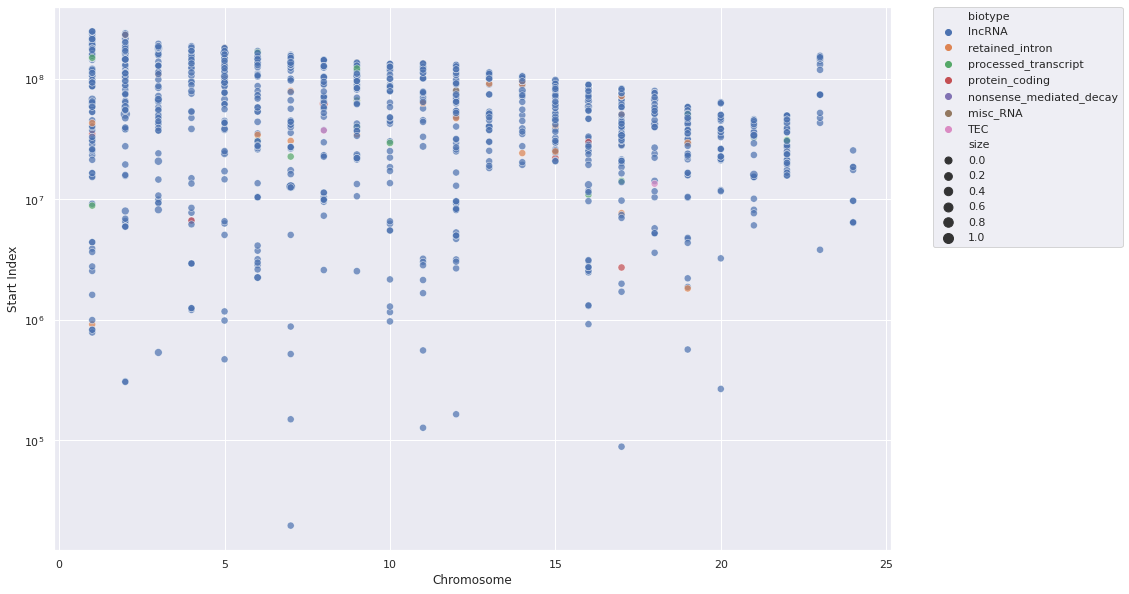

In [7]:
plot_grapgh(data = data_df,
            x = "encoded_chomosomes", 
            y = "start", 
            size = "size", 
            figure_size = (15,10),
            legend = "auto", 
            sizes = (50,100), 
            hue = "biotype", 
            alpha = 0.7)

In [8]:
def plot_by_class(class_type = None,data = None,x:str = None, y:str = None, size:str = None, 
                  figure_size:tuple = (15,10),legend:str = "auto", sizes:tuple = (50,100), 
                  class_column_name = None, alpha:float = 0.7) -> None:
    """
    class_type:  which class of data points to emphasize on
    """
    
    # get unique classes
    classes = set(data[class_column_name])
    
    hue = []
    
    for category in data[class_column_name]:
        if category == class_type:
            hue.append(class_type)
        else:
            hue.append(f"Non_{class_type}")
    #  plot
    plot_grapgh(data = data,
            x = x, 
            y = y, 
            size = size, 
            figure_size = figure_size,
            legend = legend, 
            sizes = sizes, 
            hue = hue, 
            alpha = alpha)

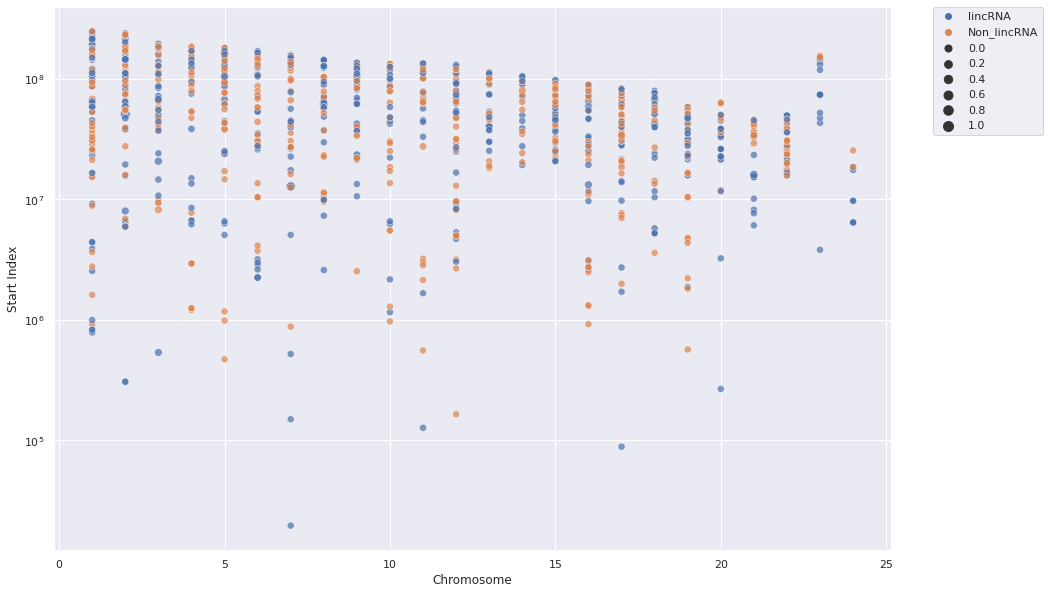

In [9]:
plot_by_class(class_type = "lincRNA",
              data = data_df,
              x = "encoded_chomosomes", 
              y = "start", 
              size = "size", 
              figure_size = (15,10),
              legend = "auto", 
              sizes = (50,100), 
              class_column_name = "ncRNA_biotype", 
              alpha = 0.7
              )

### Plots for Presentation

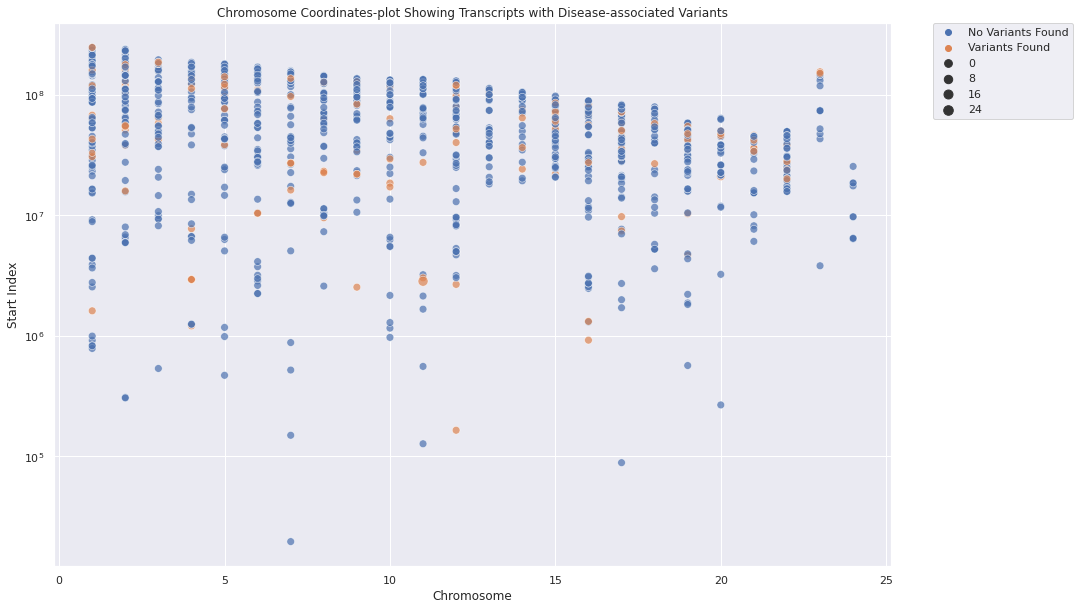

In [10]:
# Distinguish disease associated variants from others
hue = ["Variants Found" if item == True else "No Variants Found" for item in data_df.disease_variants_present]
size = (data_df.number_variants - data_df.number_variants.mean())/(data_df.number_variants - data_df.number_variants.std())
plot_grapgh(data = data_df,
            x = "encoded_chomosomes", 
            y = "start", 
            size = size, 
            figure_size = (15,10),
            legend = "auto", 
            sizes = (50,100), 
            hue = hue, 
            alpha = 0.75,
            title = "Chromosome Coordinates-plot Showing Transcripts with Disease-associated Variants")

<AxesSubplot:title={'center':'Plot showing Distribution of Transcript with Disease-associated Variants Accross Chromosomes'}, xlabel='Chromosomes', ylabel='Number of Transcripts'>

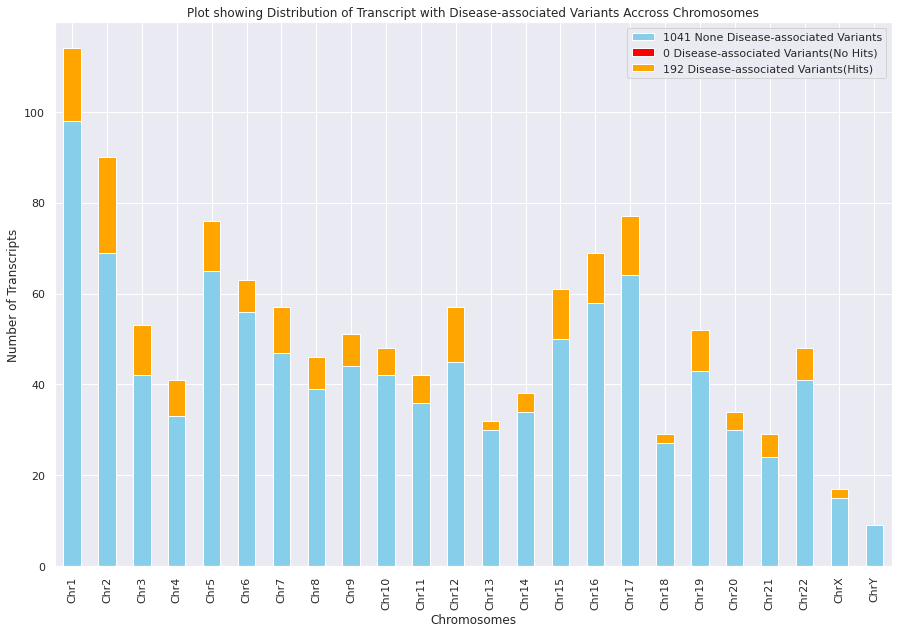

In [11]:
# Distribution of Disease variants on Chromosomes
x = [f"Chr{x}" for x in range(1,23)]
x.append("ChrX")
x.append("ChrY")
for y in data_df.contig:
    if f"Chr{y}" not in x:
        x.append(f"Chr{y}")

data_new = {"None Disease-associated Variants" : [0]*len(x), 
            "Disease-associated Variants(No Hits)" : [0]*len(x), 
            "Disease-associated Variants(Hits)" : [0]*len(x)
           }

for i in range(len(data_df)):
    contig = data_df.contig[i]
    variant_truth = data_df.disease_variants_present[i]
    hits_truth = len(data_df.blast_hit[i]) >= 5
    
    if variant_truth:
        if hits_truth:
            data_new["Disease-associated Variants(Hits)"][x.index(f"Chr{contig}")] += 1
        else:
            data_new["Disease-associated Variants(No_Hits)"][x.index(f"Chr{contig}")] += 1
    else:
        data_new["None Disease-associated Variants"][x.index(f"Chr{contig}")] += 1

data_new_df = pd.DataFrame(data_new)
data_new_df.index = x
data_new_df.rename(columns = {column:f"{data_new_df[column].sum()} {column}" for column in data_new_df.columns}, inplace = True)
data_new_df.plot(kind='bar', 
                 stacked=True, 
                 color=['skyblue','red', 'orange'],
                 xlabel = "Chromosomes",
                 ylabel = "Number of Transcripts",
                 title = "Plot showing Distribution of Transcript with Disease-associated Variants Accross Chromosomes")

In [ ]:
plt.savefig(f'{name}.png',dpi = 600)